In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Prakash\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Prakash\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Prakash\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Prakash\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Prakash\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping gr

True

In [2]:
df = pd.read_csv("Suicide_Detection.csv")
df = df.drop("Unnamed: 0",axis=1)
df.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


Null check

In [3]:
df.isna().sum()


text     0
class    0
dtype: int64

Imbalance check

<AxesSubplot:>

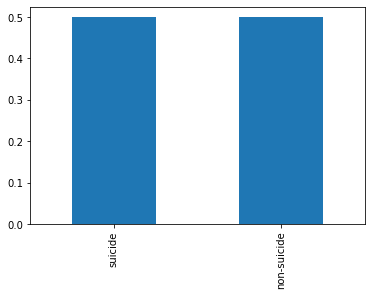

In [4]:
df["class"].value_counts(normalize=True).plot.bar()


Cleaning

In [6]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Assuming you have a DataFrame named 'df' with a column 'text'
# Initialize the WordNetLemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a function for preprocessing


def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)


# Apply the preprocessing function to the 'text' column
df['text'] = df['text'].apply(preprocess_text)


In [7]:
df.head()

,text,class
0,ex wife threatening suiciderecently left wife ...,suicide
1,weird get affected compliment coming someone k...,non-suicide
2,finally almost never hear bad year ever swear ...,non-suicide
3,need helpjust help im cry hard,suicide
4,losthello name adam struggling year afraid pas...,suicide


In [9]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)




print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (155489,)
Testing Data :  (76585,)


In [10]:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(155489, 111903)

In [11]:
# Training Logistic Regression model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_cv, y_train)


# transform X_test using CV

X_test_cv = cv.transform(X_test)


# generate predictions

predictions = lr.predict(X_test_cv)



d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'non-suicide'

In [13]:
# confusion matrix

import pandas as pd

from sklearn import metrics

cm = pd.DataFrame(metrics.confusion_matrix(y_test, predictions),
                  index=['ham', 'spam'], columns=['ham', 'spam'])

cm

,ham,spam
ham,36361,1930
spam,3548,34746


In [14]:
import joblib
joblib.dump(cv, 'count_vectorizer.pkl')
joblib.dump(lr, 'lr_model.pkl')

['lr_model.pkl']

In [ ]:
import joblib  # or use 'import pickle' if you saved with pickle
import pandas as pd  # If you need to work with data

# Load the CountVectorizer and model
# Use pickle.load() if you saved with pickle
loaded_vectorizer = joblib.load('count_vectorizer.pkl')
# Use pickle.load() if you saved with pickle
loaded_model = joblib.load('model.pkl')

# New text data to predict
new_text_data = ["This is a new text for prediction.", "Another example text."]

# Transform the new data using the loaded CountVectorizer
X_new = loaded_vectorizer.transform(new_text_data)

# Make predictions using the loaded model
predictions = loaded_model.predict(X_new)

# You can also get the class probabilities if your model supports it
class_probabilities = loaded_model.predict_proba(X_new)

# Optionally, you can create a DataFrame to view the results
results_df = pd.DataFrame(
    {'Text': new_text_data, 'Prediction': predictions, 'Class Probabilities': class_probabilities})
print(results_df)


In [15]:
import requests
from bs4 import BeautifulSoup

# Example tweet URL
tweet_url = 'https://twitter.com/Twitter/status/1234567890123456789'

# Send an HTTP request to the tweet URL
response = requests.get(tweet_url)

if response.status_code == 200:
    # Parse the HTML content of the tweet
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the tweet text within the HTML structure (Twitter's HTML structure can change over time)
    # This class might need to be adjusted based on Twitter's current HTML structure
    tweet_text = soup.find('p', class_='tweet-text')

    if tweet_text:
        # Print the tweet text
        print(tweet_text.get_text())
    else:
        print("Tweet text not found on the page.")
else:
    print(
        f"Failed to fetch the tweet. HTTP status code: {response.status_code}")


Tweet text not found on the page.
